In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from tensorflow.keras.utils import to_categorical
!pip install -q -U keras-tuner
import keras_tuner as kt
import random
import time
import math
from google.colab import files
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re
from collections import defaultdict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 850.8 kB/s eta 0:00:00


# Ejercicio 1
Implementación del perceptrón

In [ ]:
data = [
  [1, 0],
  [0, 2],
  [1, 1],
  [1, 2],
  [1, 3],
  [2, 2],
  [2, 3],
  [3, 2],
]

data_labels = [0, 0, 0, 0, 1, 1, 1, 1]
grade = len(data[0])

In [ ]:
class Perceptron:
    def __init__(self, inital_weights: list = None, grade: int = 0):
        self.weights = inital_weights if inital_weights else [random.uniform(-1, 1) for _ in range(grade+1)]

    def get_weights(self) -> list:
        return self.weights.copy()

    def set_weights(self, weights: list):
        self.weights = weights

    def calc_line_ecuation(self, point: list) -> float:
        result = 0

        for i in range(len(point)):
            result += self.weights[i] * point[i]

        result += self.weights[-1] # Add bias (last element of the weights list)

        return result

    def predict_point(self, point: list) -> int:
        return int(self.calc_line_ecuation(point) >= 0)

    def predict(self, data: list[list], values: bool = False) -> list[int]:
        if values:
            return [self.calc_line_ecuation(point) for point in data]

        # If x = w1 + w2 + ... + w3 >= 0, then step(x) = 1
        return [self.predict_point(point) for point in data]

    def ajust(self, epochs: int, learning_rate: float, data: list[list], data_labels: list[bool]):
        for _ in range(epochs):
            # Select a random point from the dataset and its corresponding label
            random_point_index = random.randint(0, len(data)-1)
            point = data[random_point_index]
            point_label = data_labels[random_point_index]

            prediction = self.predict_point(point) # Predict the label of the random point

            # Perceptron trick
            for i in range(len(point)):
                self.weights[i] = self.weights[i] + learning_rate * (point_label - prediction) * point[0]

            self.weights[-1] = self.weights[-1] + learning_rate * (point_label - prediction)

    def error(self, data: list[list]) -> float:
        error = 0.0

        for point in data:
            for i in range(len(point)):
                error += self.weights[i] * point[i]

            error += self.weights[-1] # error = |w1*x1 + w2*x2 + ... + wn*xn + b|

        # Average error of all points
        return abs(error) / len(data)



# Ejercicio 2
Programa principal para usar el perceptrón

In [ ]:
perceptron = Perceptron(grade=grade)

print(f"Initial weights: {perceptron.get_weights()}")
print(f"Initial prediction: {perceptron.predict(data=data)}")
print(f"Initial error: {perceptron.error(data=data)}\n")

# Ajust the perceptron
epochs = 10_000
learning_rate = 0.01

print(f"Ajusting perceptron for {epochs} epochs with a learning rate of {learning_rate}\n")

start = time.time()
perceptron.ajust(epochs=epochs, learning_rate=learning_rate, data=data, data_labels=data_labels)
end = time.time()

ajust_time = end - start

print(f"Adjusted weights: {perceptron.get_weights()}")
print(f"Adjusted prediction: {perceptron.predict(data=data)}")
print(f"Adjusted error: {perceptron.error(data=data)}\n")

print(f"Adjusted Perceptron time: {ajust_time} seconds\n")


Initial weights: [-0.31837957350673185, 0.4994548438230957, 0.36588487928404345]
Initial prediction: [1, 1, 1, 1, 1, 1, 1, 1]
Initial error: 0.8645907978805915

Ajusting perceptron for 10000 epochs with a learning rate of 0.01

Adjusted weights: [0.02162042649326787, 0.839454843823096, -1.704115120715958]
Adjusted prediction: [0, 0, 0, 0, 1, 1, 1, 1]
Adjusted error: 0.1004092021194096

Adjusted Perceptron time: 0.07076311111450195 seconds



# Ejercicio 3
Implementación modelo de clasificación logística

In [ ]:
class LogisticRegression(Perceptron):
    def __init__(self, inital_weights: list = None, grade: int = 0):
        super().__init__(inital_weights, grade)

    def predict_point(self, point: list) -> float:
        result: float = 0

        for i in range(len(point)):
            result += self.weights[i] * point[i]

        result += self.weights[-1] # Add bias (last element of the weights list)

        # sigma(x) = 1 / (1 + exp(-x))
        return 1 / (1 + math.exp(-result))

    def predict(self, data: list[list], threshold: float = 0.5, prob: bool = False) -> list:
        if prob:
            return [self.predict_point(point) for point in data]

        return [int(self.predict_point(point) >= threshold) for point in data]

    def error(self, data: list[list], data_labels: list[bool]) -> float:
        error = 0

        for i in range(len(data)):
            # logloss = -ylog(ŷ) - (1-y)log(1-ŷ)
            label = data_labels[i] # y
            prediction = self.predict_point(data[i]) # ŷ

            logloss = -label*math.log(prediction) - (1-label)*math.log(1-prediction)

            error += logloss

        return error / len(data)

## Programa pricipal para clasificación logística

In [ ]:
logistical_regression = LogisticRegression(grade=grade)

# Ajust the logistical_regression
epochs = 10000
learning_rate = 0.01
threshold = 0.5

print(f"Initial weights: {logistical_regression.get_weights()}")
print(f"Initial prediction: {logistical_regression.predict(data=data, threshold=threshold)}")
print(f"Initial prediction (prob): {logistical_regression.predict(data=data, threshold=threshold, prob=True)}")
print(f"Initial error: {logistical_regression.error(data=data, data_labels=data_labels)}\n")

print(f"Ajusting logistical regression for {epochs} epochs with a learning rate of {learning_rate} with a threshold of {threshold}\n")

start = time.time()
logistical_regression.ajust(epochs=epochs, learning_rate=learning_rate, data=data, data_labels=data_labels)
end = time.time()

ajust_time = end - start

print(f"Adjusted weights: {logistical_regression.get_weights()}")
print(f"Adjusted prediction: {logistical_regression.predict(data=data, threshold=threshold)}")
print(f"Adjusted prediction (prob): {logistical_regression.predict(data=data, threshold=threshold, prob=True)}")
print(f"Adjusted error: {logistical_regression.error(data=data, data_labels=data_labels)}\n")

print(f"Adjusted Logistic Regression time: {ajust_time} seconds")

Initial weights: [-0.3486319058710581, 0.9206842808992202, -0.11277480847535726]
Initial prediction: [0, 1, 1, 1, 1, 1, 1, 1]
Initial prediction (prob): [0.38665216521630147, 0.8492324574940554, 0.6128427808587557, 0.7989848727131924, 0.9089305369200918, 0.7371736514964582, 0.8756661062271084, 0.6643406047489301]
Initial error: 0.7345359758264959

Ajusting logistical regression for 10000 epochs with a learning rate of 0.01 with a threshold of 0.5

Adjusted weights: [1.8124632417682895, 3.0817794285385873, -8.20745284390587]
Adjusted prediction: [0, 0, 0, 0, 1, 1, 1, 1]
Adjusted prediction (prob): [0.0016671192991011864, 0.11467081541568819, 0.035120772585372495, 0.4423991771120614, 0.9453367038777282, 0.8293506949903185, 0.9906483972083792, 0.9675006415378168]
Adjusted error: 0.12863620305768622

Adjusted Logistic Regression time: 0.051516056060791016 seconds


# Ejercicio 4

##Matriz de confusion

In [ ]:

def ConfusionMatrix(y,yPredicted,treshold=0.5):
    matrix = [[0,0],[0,0]]

    for i in range(len(y)):
        if y[i]>=treshold and yPredicted[i]>=treshold:
            matrix [0][0] +=1
        elif y[i]>=treshold and yPredicted[i]<treshold:
            matrix [0][1] +=1
        elif y[i]<treshold and yPredicted[i]>=treshold:
            matrix [1][0] +=1
        elif y[i]<treshold and yPredicted[i]<treshold:
            matrix [1][1] +=1

    return matrix

##Métricas de calidad


Exactitud

In [ ]:
def accuracy(conf_mat):
    total = conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0]+conf_mat[1][1]
    positives=conf_mat[0][0]+conf_mat[1][1]
    accu=positives/total
    return accu


Recall

In [ ]:
def recall(conf_mat):
    return conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])

Precision

In [ ]:
def precision(conf_mat):
    return conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])

F1 y Fb

In [ ]:
def Fb(conf_mat,b=1):
    Pr = precision(conf_mat)
    Re = recall(conf_mat)
    FMeasure=((1+b**2)*Pr*Re)/((Pr*b**2)+Re)
    return FMeasure

Sensibilidad

In [ ]:
def sensitivity(conf_mat):
    return recall(conf_mat)

Especificidad

In [ ]:
def specificity(conf_mat):
    return conf_mat[1][1]/(conf_mat[1][1]+conf_mat[1][0])

# Ejercicio 5

##Resultados de calidad perceptrón

In [ ]:
perceptron = Perceptron(grade=grade)

print(f"Initial weights: {perceptron.get_weights()}")
print(f"Initial prediction: {perceptron.predict(data=data)}")
print(f"Initial error: {perceptron.error(data=data)}\n")

# Ajust the perceptron
epochs = 350
learning_rate = 0.01

print(f"Ajusting perceptron for {epochs} epochs with a learning rate of {learning_rate}\n")

perceptron.ajust(epochs=epochs, learning_rate=learning_rate, data=data, data_labels=data_labels)

print(f"Adjusted weights: {perceptron.get_weights()}")
print(f"Adjusted prediction: {perceptron.predict(data=data)}")
print(f"Adjusted error: {perceptron.error(data=data)}\n")

y = data_labels
yPredicted = perceptron.predict(data=data)
conf_mat = ConfusionMatrix(y,yPredicted,0.5)

print(f"Matriz de confusion: {conf_mat}")
print(f"True Positives: {conf_mat[0][0]}")
print(f"False Negatives: {conf_mat[0][1]}")
print(f"False Positives: {conf_mat[1][0]}")
print(f"True Negatives: {conf_mat[1][1]}\n")

print(f"Accuracy: {accuracy(conf_mat)}")
print(f"Recall: {recall(conf_mat)}")
print(f"Precion: {precision(conf_mat)}")
print(f"F1: {Fb(conf_mat)}")
print(f"F(b=0.5): {Fb(conf_mat, 0.5)}")
print(f"F(b=1.5): {Fb(conf_mat, 1.5)}")
print(f"Sensitivity: {sensitivity(conf_mat)}")
print(f"Specificity: {specificity(conf_mat)}")


Initial weights: [-0.9285210836676443, 0.3417274467226388, 0.9989434636826784]
Initial prediction: [1, 1, 1, 1, 1, 0, 1, 0]
Initial error: 0.36296593624461515

Ajusting perceptron for 350 epochs with a learning rate of 0.01

Adjusted weights: [-0.5085210836676439, 0.7617274467226391, 0.13894346368267763]
Adjusted prediction: [0, 1, 1, 1, 1, 1, 1, 1]
Adjusted error: 0.8679659362446157

Matriz de confusion: [[4, 0], [3, 1]]
True Positives: 4
False Negatives: 0
False Positives: 3
True Negatives: 1

Accuracy: 0.625
Recall: 1.0
Precion: 0.5714285714285714
F1: 0.7272727272727273
F(b=0.5): 0.625
F(b=1.5): 0.8125
Sensitivity: 1.0
Specificity: 0.25


##Resultados de calidad clasificación logística

In [ ]:
logistical_regression = LogisticRegression(grade=grade)

epochs = 600
learning_rate = 0.01
threshold = 0.5

print(f"Initial weights: {logistical_regression.get_weights()}")
print(f"Initial prediction: {logistical_regression.predict(data=data, threshold=threshold)}")
print(f"Initial prediction (prob): {logistical_regression.predict(data=data, threshold=threshold, prob=True)}")
print(f"Initial error: {logistical_regression.error(data=data, data_labels=data_labels)}\n")

print(f"Ajusting logistical regression for {epochs} epochs with a learning rate of {learning_rate} with a threshold of {threshold}\n")

logistical_regression.ajust(epochs=epochs, learning_rate=learning_rate, data=data, data_labels=data_labels)

print(f"Adjusted weights: {logistical_regression.get_weights()}")
print(f"Adjusted prediction: {logistical_regression.predict(data=data, threshold=threshold)}")
print(f"Adjusted prediction (prob): {logistical_regression.predict(data=data, threshold=threshold, prob=True)}")
print(f"Adjusted error: {logistical_regression.error(data=data, data_labels=data_labels)}\n")

y = data_labels
yPredicted = logistical_regression.predict(data=data, threshold=threshold, prob=True)
conf_mat = ConfusionMatrix(y,yPredicted,threshold)

print(f"Matriz de confusion: {conf_mat}")
print(f"True Positives: {conf_mat[0][0]}")
print(f"False Negatives: {conf_mat[0][1]}")
print(f"False Positives: {conf_mat[1][0]}")
print(f"True Negatives: {conf_mat[1][1]}\n")

print(f"Accuracy: {accuracy(conf_mat)}")
print(f"Recall: {recall(conf_mat)}")
print(f"Precion: {precision(conf_mat)}")
print(f"F1: {Fb(conf_mat)}")
print(f"F(b=0.5): {Fb(conf_mat, 0.5)}")
print(f"F(b=1.5): {Fb(conf_mat, 1.5)}")
print(f"Sensitivity: {sensitivity(conf_mat)}")
print(f"Specificity: {specificity(conf_mat)}")

Initial weights: [0.2687064085468156, 0.3573195973358225, -0.5958721443833734]
Initial prediction: [0, 1, 1, 1, 1, 1, 1, 1]
Initial prediction (prob): [0.41893040266822734, 0.529656910025444, 0.5075378942275752, 0.5956743382795014, 0.678043075241064, 0.6584017272874318, 0.7337044414169144, 0.7160366710780356]
Initial error: 0.54515092145464

Ajusting logistical regression for 600 epochs with a learning rate of 0.01 with a threshold of 0.5

Adjusted weights: [0.5535941628132652, 0.6422073516022722, -1.3311933320923937]
Adjusted prediction: [0, 0, 0, 1, 1, 1, 1, 1]
Adjusted prediction (prob): [0.31483755056901364, 0.4883074748713298, 0.4662036563892745, 0.6240596651002994, 0.7593323977469782, 0.7427688310967198, 0.8458762274697136, 0.8339665278443094]
Adjusted error: 0.4469783405043578

Matriz de confusion: [[4, 0], [1, 3]]
True Positives: 4
False Negatives: 0
False Positives: 1
True Negatives: 3

Accuracy: 0.875
Recall: 1.0
Precion: 0.8
F1: 0.888888888888889
F(b=0.5): 0.8333333333333334

# Ejercicio 6

## Preparación del dataset (sólo ejecutar una vez)

In [ ]:
# Leer el DataFrame
df = pd.read_csv('IMDB_Dataset.csv')

df.rename(columns={'sentiment': '_Y_'}, inplace=True)
df.head()

,review,_Y_
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
textos = df['review']

palabras_filas = defaultdict(int)

# Iterar sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Obtener el texto de la fila
    texto = row['review']
    # Utilizar una expresión regular para encontrar todas las palabras en el texto
    palabras = re.findall(r'\b\w+\b', texto.lower())
    # Convertir las palabras en un conjunto para evitar contar la misma palabra más de una vez por fila
    palabras_en_fila = set(palabras)
    # Incrementar el contador de filas para cada palabra en esta fila
    for palabra in palabras_en_fila:
        palabras_filas[palabra] += 1

# Convertir el diccionario a una lista de tuplas (palabra, número de filas)
lista_palabras_filas = [(palabra, num_filas) for palabra, num_filas in palabras_filas.items() if num_filas >= 100]

# Ordenar la lista en orden descendente según el número de filas
lista_palabras_filas.sort(key=lambda x: x[1], reverse=True)

In [ ]:
# Supongamos que el texto está en una columna llamada 'review'
textos = df['review']

# Crear un diccionario para almacenar el número de ocurrencias de cada palabra en cada fila
palabras_por_fila = defaultdict(int)

# Iterar sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Obtener el texto de la fila
    texto = row['review']
    # Inicializar el contador de palabras para esta fila
    conteo_palabras = {}
    # Utilizar una expresión regular para encontrar todas las palabras en el texto
    palabras = re.findall(r'\b\w+\b', texto.lower())
    # Contar las ocurrencias de cada palabra en esta fila
    for palabra in palabras:
        conteo_palabras[palabra] = conteo_palabras.get(palabra, 0) + 1
    # Actualizar el diccionario de conteo de palabras para esta fila
    palabras_por_fila[index] = conteo_palabras

# Obtener las palabras únicas que aparecen en al menos 100 filas
palabras_unicas = [palabra for palabra, num_filas in palabras_filas.items() if num_filas >= 100]
it = 1
# Agregar una columna por cada palabra única y rellenarla con el conteo de esa palabra en cada fila
for palabra in palabras_unicas:
    # Crear una nueva columna con el nombre de la palabra y rellenarla con el conteo de esa palabra en cada fila
    it+=1
    df[palabra] = [palabras_por_fila[i].get(palabra, 0) for i in range(len(df))]

In [ ]:
sentiment = df['_Y_'].map({'negative':0,'positive':1})
df = df.drop(columns='_Y_')
df = pd.concat([df,sentiment], axis=1)

Aviso: Se guarda en un archivo .csv debido al tamaño del dataset tras procesarse suele dar error al llenarse la memoria RAM del colab. En el caso de error si se ha guardado correctamente el dataset en la línea siguiente se recomienda pasar directamente a la sección siguiente "Implementación del clasificador logístico con scikitlearn para análisis de sentimientos"

In [ ]:
df.to_csv('dataset_con_palabras_contadas.csv')
del df

## Implementación del clasificador logístico con scikitlearn para análisis de sentimientos

In [ ]:
df = pd.read_csv('dataset_con_palabras_contadas.csv')

# Separar las características (X) y la etiqueta (y)
X = df.iloc[:, :-1]  # Todas las columnas excepto la última
y = df.iloc[:, -1]   # Última columna
del df
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = linear_model.LogisticRegression()

classifier.fit(X_train, y_train)

print('score: ', classifier.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score:  0.882


# Ejercicio 7

In [ ]:
y_pred = classifier.predict(X_test)
cm = ConfusionMatrix(y_test.values, y_pred)
print(f"Exactitud = {accuracy(cm)}")
print(f"Recall = {recall(cm)}")
print(f"Precision = {precision(cm)}")
print(f"F1 = {Fb(cm)}")
print(f"Fb(b=0.3) = {Fb(cm,0.3)}")
print(f"Fb(b=5) = {Fb(cm,5)}")
print(f"Sensibilidad = {sensitivity(cm)}")
print(f"Especificidad = {specificity(cm)}")

# Ejercicio 8

Sensibilidad = 1, Especificidad = 0 (t = 0.01)
Sensibilidad = 0.9958325064496923, Especificidad = 0.3541624672445072 (t = 0.02)
Sensibilidad = 0.9938479857114507, Especificidad = 0.42471275952428944 (t = 0.03)
Sensibilidad = 0.9924588211946815, Especificidad = 0.47046966337431967 (t = 0.04)
Sensibilidad = 0.9914665608255606, Especificidad = 0.5053416649868978 (t = 0.05)
Sensibilidad = 0.9894820400873189, Especificidad = 0.5297319088893369 (t = 0.06)
Sensibilidad = 0.9880928755705497, Especificidad = 0.5551300141100585 (t = 0.07)
Sensibilidad = 0.986108354832308, Especificidad = 0.5777061076395887 (t = 0.08)
Sensibilidad = 0.984917642389363, Especificidad = 0.5970570449506148 (t = 0.09)
Sensibilidad = 0.982734669577297, Especificidad = 0.6166095545252973 (t = 0.1)
Sensibilidad = 0.9811470529867037, Especificidad = 0.6317274742995364 (t = 0.11)
Sensibilidad = 0.9797578884699345, Especificidad = 0.6460391050191494 (t = 0.12)
Sensibilidad = 0.9783687239531653, Especificidad = 0.65873815762

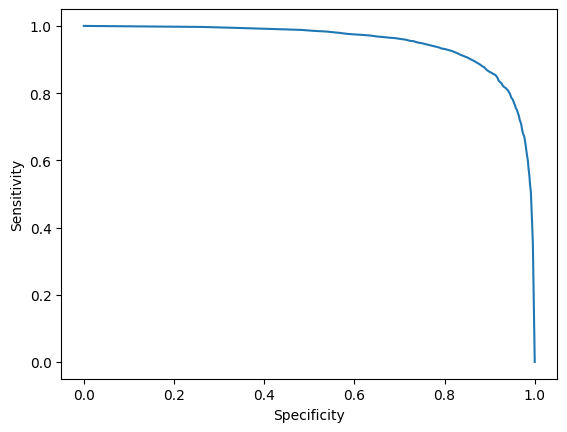

In [ ]:
sens = [1]
specif = [0]
y_predict = (classifier.predict_proba(X_test)[:, 1]).astype(float)
for t in range(1, 101):
    cm = ConfusionMatrix(y_test.values, y_predict,0.01 * t)
    sens.append(sensitivity(cm))
    specif.append(specificity(cm))
    print(f"Sensibilidad = {sens[t-1]}, Especificidad = {specif[t-1]} (t = {0.01*t})")

plt.plot(sens, specif)
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.show()


#Ejercicio 9

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'Porcentaje de test: {len(x_test)*100/(len(x_test)+len(x_train))}%')

11490434/11490434 [==============================] - 0s 0us/step
Porcentaje de test: 14.285714285714286%


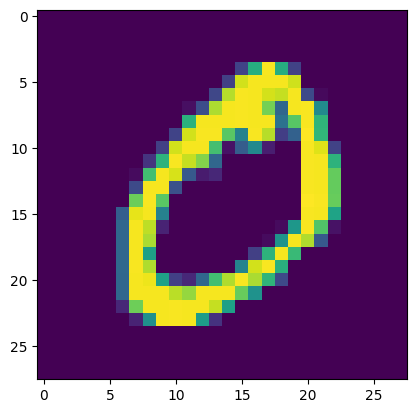

In [ ]:
plt.imshow(x_train[1])

In [ ]:
class_labels = []
for i in range(10):
  class_labels.append(str(i))
print(class_labels)



['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Se comprueban si los datos de entremaniento tienen algún valor vacío

In [ ]:
print(np.isnan(x_train).any())
print(np.isnan(y_train).any())

False
False


Se cambian los datos a un formato compatible con el de la entrada de la red neuronal

In [ ]:

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size

x_train = np.reshape(x_train, [-1, input_size])

x_test = np.reshape(x_test, [-1, input_size])

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
modelo = keras.Sequential()
modelo.add(keras.Input(shape=(input_size)))
modelo.add(keras.layers.Dense(120,activation='relu'))
modelo.add(keras.layers.Dense(64,activation='relu'))
modelo.add(keras.layers.Dense(10,activation='softmax'))

modelo.compile(optimizer='Adam', loss='categorical_crossentropy')


In [ ]:
modelo.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2477
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1020
Epoch 3/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0714


313/313 [==============================] - 1s 2ms/step


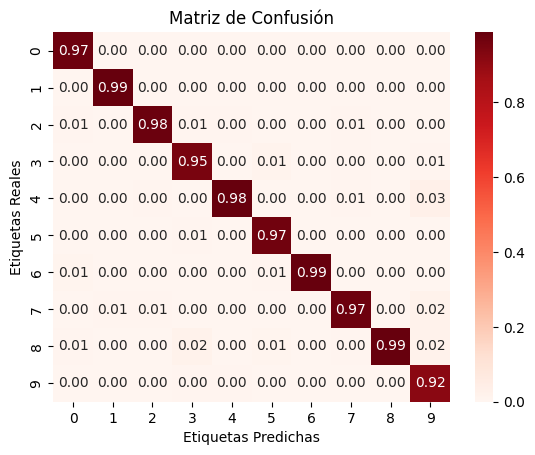

Accuracy: 0.9703
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.95      0.97       982
           5       0.97      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.99      0.92      0.95       974
           9       0.92      0.98      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
def mostrar_matriz_confusion(modelo, x_test, y_test, class_labels=None):
    y_pred = modelo.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)
    if len(y_test.shape) > 1:
        y_test = np.argmax(y_test, axis=1)
    else:
        y_test = y_test

    result = confusion_matrix(y_test, y_pred, normalize='pred')

    if class_labels is None:
        class_labels = [str(i) for i in range(result.shape[0])]

    sns.heatmap(result, annot=True, fmt=".2f", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Etiquetas Predichas')
    plt.ylabel('Etiquetas Reales')
    plt.title('Matriz de Confusión')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    report = classification_report(y_test, y_pred, target_names=class_labels)
    print(report)
if len(y_test.shape) == 1:
    y_test = to_categorical(y_test)

mostrar_matriz_confusion(modelo, x_test, y_test)


##Optimización de Hiperparámetros




In [ ]:
class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        # Agrega capas densas
        hp_layers = hp.Int('layers', min_value=1, max_value=4, step=1)
        for i in range(hp_layers):
            n_units = hp.Choice('n_units' + str(i), values=[16, 32, 64, 128])  # Hiperparámetro para la función de activación de la capa i
            model.add(keras.layers.Dense(units=n_units, activation='relu'))  # Usa el hiperparámetro para la función de activación

        # Agrega una capa de salida con activación lineal para regresión
        model.add(keras.layers.Dense(10,activation='softmax'))

        # Optimizador y tasa de aprendizaje
        hp_optimizer = hp.Choice('optimizer', values=['adam'])
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        if hp_optimizer == 'adam':
            optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate)
        else:
            optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice('batch_size', values=[16, 32, 64, 128]),
            **kwargs,
        )

# Callbacks
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
)
tuner = kt.RandomSearch(
    MyHyperModel(),
    objective="val_accuracy",  # Objetivo es minimizar el error cuadrático medio
    max_trials=50,
    overwrite=True,
    directory="my_dir",
    project_name="tune_hypermodel",
    executions_per_trial=1,  # Evita que se muestre el progreso de entrenamiento
)

# Realiza la búsqueda de hiperparámetros
tuner.search(x_train, y_train, epochs=10, validation_data=[x_test,y_test], callbacks=[stop_early, checkpoint_callback])

# Obtiene la mejor combinación de hiperparámetros al finalizar la búsqueda
best_trial = tuner.oracle.get_best_trials(1)[0]
best_hps = best_trial.hyperparameters

best_units = [best_hps.get('n_units' + str(i)) for i in range(best_hps.get('layers'))]

print(f"""
Búsqueda de hiperparámetros completada.
Unidades por capa:
""")
for i, units in enumerate(best_units):
    print(f"De la capa {i+1}: {units}")

print(f"""
Número óptimo de capas densas: {best_hps.get('layers')}
Optimizador óptimo: {best_hps.get('optimizer')}
Ratio de aprendizaje óptimo: {best_hps.get('learning_rate')}
Tamaño de batch óptimo: {best_hps.get('batch_size')}
""")

model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=10)

# Evaluar el mejor modelo en el conjunto de prueba
mse, mae = model.evaluate(x_test, y_test)
print("Mean Squared Error en el conjunto de prueba:", mse)
print("Mean Absolute Error en el conjunto de prueba:", mae)


Trial 50 Complete [00h 00m 24s]
val_accuracy: 0.9517999887466431

Best val_accuracy So Far: 0.9783999919891357
Total elapsed time: 01h 03m 53s

Búsqueda de hiperparámetros completada.
Unidades por capa:

De la capa 1: 128
De la capa 2: 16
De la capa 3: 128
De la capa 4: 32

Número óptimo de capas densas: 4
Optimizador óptimo: adam
Ratio de aprendizaje óptimo: 0.001
Tamaño de batch óptimo: 64

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2794 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1142 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0837 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0543 - accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0459 - accuracy:

In [ ]:
import json

# Suponiendo que tuner es tu objeto keras.tuner.Tuner
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0].values

# Guardar los mejores hiperparámetros en un archivo JSON
with open('best_hyperparameters.json', 'w') as f:
    json.dump(best_hyperparameters, f)


In [ ]:
model.save('mejor_modelo_ej9.h5')

In [ ]:
modelo = keras.models.load_model('mejor_modelo_ej9.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dense_7 (Dense)             (None, 128)               2176      
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 109178 (426.48 KB)
Trainable params: 109178 (426.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
for layer in model.layers:
    # Muestra el tipo de capa y la función de activación (si la capa tiene una)
    print(layer.name, "-", layer.__class__.__name__)
    if hasattr(layer, 'activation'):
        print("Función de activación:", layer.activation.__name__)

dense_5 - Dense
Función de activación: relu
dense_6 - Dense
Función de activación: relu
dense_7 - Dense
Función de activación: relu
dense_8 - Dense
Función de activación: relu
dense_9 - Dense
Función de activación: softmax


313/313 [==============================] - 2s 4ms/step


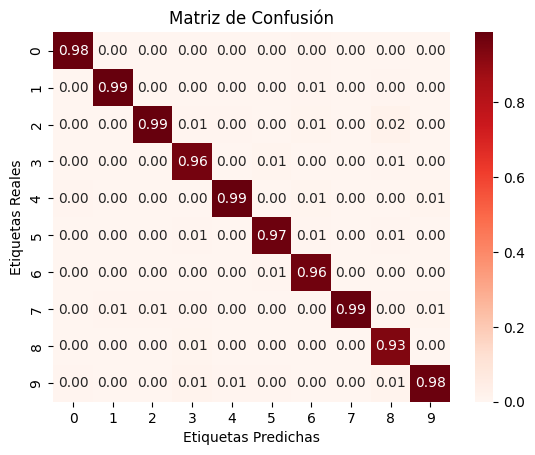

Accuracy: 0.9732
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.96      0.98      0.97       958
           7       0.99      0.97      0.98      1028
           8       0.93      0.99      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
mostrar_matriz_confusion(model, x_test, y_test)

#Ejercicio 10


Aviso: Se debe de subir el dataset diabetes al colab, previamente habiendo cambiado la extensión ".txt" a ".csv"

In [ ]:
data = pd.read_csv('diabetes.tab.csv',delimiter='\t')
def from_dataset_to_arrays(data):
  Y = data['Y']
  y = list(Y.values)
  data = data.drop(columns='Y')
  x = list(data.values)
  for a in range(len(x)):
    b = list(x[a])
    x[a] = b

  return x,y
X,y = from_dataset_to_arrays(data)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [ ]:
modelo_regresion = keras.Sequential()
modelo_regresion.add(keras.Input(shape=(10,)))
modelo_regresion.add(keras.layers.Dense(128,activation='relu'))
modelo_regresion.add(keras.layers.Dropout(0.2))
modelo_regresion.add(keras.layers.Dense(64,activation='relu'))
modelo_regresion.add(keras.layers.Dropout(0.2))
modelo_regresion.add(keras.layers.Dense(1))

modelo_regresion.compile(optimizer='Adam', loss='mse')

In [ ]:
modelo_regresion.fit(x_train,y_train,batch_size=32, epochs=10)

Epoch 1/10
12/12 [==============================] - 3s 5ms/step - loss: 14727.6738
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 8120.0913
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 6704.5488
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 6825.8682
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 6217.6904
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 6354.9902
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 6365.8413
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 6122.6821
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 5654.8975
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 6074.9917


In [ ]:
modelo_regresion.evaluate(x_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 4317.7925


4317.79248046875



##Optimización de Hiperparámetros

In [ ]:
class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        # Agrega capas densas
        hp_layers = hp.Int('layers', min_value=1, max_value=4, step=1)
        for i in range(hp_layers):
            n_units = hp.Choice('n_units' + str(i), values=[16, 32, 64, 128])  # Hiperparámetro para la función de activación de la capa i
            activation = hp.Choice('activation_layer_' + str(i), values=['relu', 'sigmoid'])  # Hiperparámetro para la función de activación de la capa i
            model.add(keras.layers.Dense(units=n_units, activation=activation))  # Usa el hiperparámetro para la función de activación
            # Agrega una capa de dropout para prevenir el sobreajuste
            model.add(keras.layers.Dropout(0.2))

        # Agrega una capa de salida con activación lineal para regresión
        model.add(keras.layers.Dense(1))

        # Optimizador y tasa de aprendizaje
        hp_optimizer = hp.Choice('optimizer', values=['adam'])
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        if hp_optimizer == 'adam':
            optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate)
        else:
            optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate)

        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice('batch_size', values=[16, 32, 64, 128]),
            **kwargs,
        )

# Callbacks
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',  # Monitoriza el error cuadrático medio
    save_best_only=True,
    mode='min',
)
tuner = kt.RandomSearch(
    MyHyperModel(),
    objective="val_loss",  # Objetivo es minimizar el error cuadrático medio
    max_trials=100,
    overwrite=True,
    directory="my_dir",
    project_name="tune_hypermodel",
    executions_per_trial=1,  # Evita que se muestre el progreso de entrenamiento
)

# Realiza la búsqueda de hiperparámetros
tuner.search(x_train, y_train, epochs=30, validation_data=[x_test,y_test], callbacks=[stop_early, checkpoint_callback])

# Obtiene la mejor combinación de hiperparámetros al finalizar la búsqueda
best_trial = tuner.oracle.get_best_trials(1)[0]
best_hps = best_trial.hyperparameters

print("\nValores de los hiperparámetros:")
for key, value in best_hps.values.items():
    print(f"{key}: {value}")
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=30)

# Evaluar el mejor modelo en el conjunto de prueba
mse, mae = model.evaluate(x_test, y_test)
print("Mean Squared Error en el conjunto de prueba:", mse)
print("Mean Absolute Error en el conjunto de prueba:", mae)


Trial 100 Complete [00h 00m 04s]
val_loss: 3412.259765625

Best val_loss So Far: 3412.259765625
Total elapsed time: 00h 10m 52s

Valores de los hiperparámetros:
layers: 1
n_units0: 32
activation_layer_0: relu
optimizer: adam
learning_rate: 0.01
batch_size: 128
n_units1: 16
activation_layer_1: relu
n_units2: 64
activation_layer_2: sigmoid
n_units3: 64
activation_layer_3: relu
Epoch 1/30
12/12 [==============================] - 1s 3ms/step - loss: 10684.8623 - mean_absolute_error: 82.4611
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 6965.8818 - mean_absolute_error: 67.0774
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 6299.8887 - mean_absolute_error: 65.7811
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 6796.9438 - mean_absolute_error: 66.6063
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 6257.1040 - mean_absolute_error: 65.9782
Epoch 6/30
12/12 [==============================] - 0s 3

In [ ]:
import json

best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0].values

# Guardar los mejores hiperparámetros en un archivo JSON
with open('best_hyperparameters.json', 'w') as f:
    json.dump(best_hyperparameters, f)

In [ ]:
modelo = keras.models.load_model('best_model.h5')

In [ ]:
modelo.summary()

In [ ]:
for layer in modelo.layers:
    # Muestra el tipo de capa y la función de activación (si la capa tiene una)
    print(layer.name, "-", layer.__class__.__name__)
    if hasattr(layer, 'activation'):
        print("   Función de activación:", layer.activation.__name__)

In [ ]:
mse, mae = modelo.evaluate(x_test, y_test)
print("Mean Squared Error en el conjunto de prueba:", mse)
print("Mean Absolute Error en el conjunto de prueba:", mae)

3/3 [==============================] - 0s 4ms/step - loss: 3773.8167 - mean_absolute_error: 52.2777
Mean Squared Error en el conjunto de prueba: 3773.816650390625
Mean Absolute Error en el conjunto de prueba: 52.277732849121094
